<a href="https://colab.research.google.com/github/Ayesha52774/PRODIGY-DS-04/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal:Analyze traffic accident data to identify patterns related
to road conditions, weather, and time of day. Visualize
accident hotspots and contributing factors.

In [ ]:
# load dataset
import seaborn as sns
df=sns.load_dataset("car_crashes")
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [ ]:
# Understanding the Data
df.shape
print(df.columns)
print(df.info())
print(df.describe())

(51, 8)
Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB
None
           total   speeding    alcohol  not_distracted  no_previous  \
count  51.000000  51.000000  51.000000       51.000000    51.000000   
mean   15.790196   4.998196   4.886784       13.573176    14.004882   
std     4.122002   2.017747  

total → total crashes per billion miles

speeding → % crashes involving speeding

alcohol → % crashes involving alcohol

not_distracted → % crashes with drivers not distracted

no_previous → % drivers with no previous accidents

ins_premium → average insurance premium

ins_losses → average insurance losses

abbrev → state code

In [ ]:
df.isnull().sum()

,0
total,0
speeding,0
alcohol,0
not_distracted,0
no_previous,0
ins_premium,0
ins_losses,0
abbrev,0


Since we don’t have weather, time-of-day, or road condition, we’ll create fake but realistic data to mimic analysis:

In [ ]:
import numpy as np
np.random.seed(42)

df['weather'] = np.random.choice(['Clear', 'Rainy', 'Snowy', 'Foggy'], size=len(df))
df['road_condition'] = np.random.choice(['Dry', 'Wet', 'Icy'], size=len(df))
df['time_of_day'] = np.random.choice(['Morning', 'Afternoon', 'Night'], size=len(df))

In [ ]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,weather,road_condition,time_of_day
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,Snowy,Wet,Night
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,Foggy,Icy,Morning
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,Clear,Icy,Afternoon
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,Snowy,Dry,Morning
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,Snowy,Icy,Morning


3️⃣ Analyze Accident Patterns

weather
Rainy    17.700000
Snowy    15.557143
Foggy    15.537500
Clear    14.420000
Name: total, dtype: float64


<Axes: xlabel='weather'>

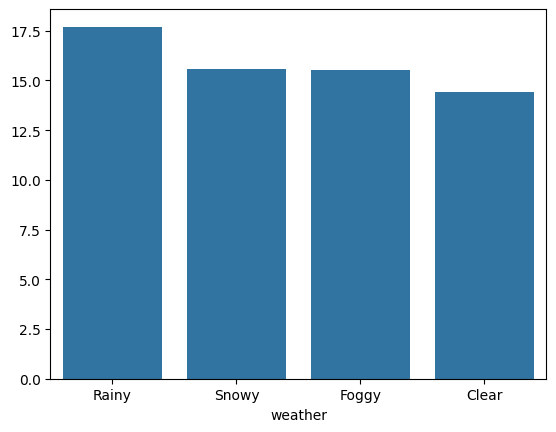

In [ ]:
# which whether has the highest avg crashes?
Weather_analysis=df.groupby("weather")["total"].mean().sort_values(ascending=False)
print(Weather_analysis)
sns.barplot(x=Weather_analysis.index, y=Weather_analysis.values)

time_of_day
Night        16.423810
Afternoon    15.555556
Morning      15.257143
Name: total, dtype: float64


<Axes: xlabel='time_of_day'>

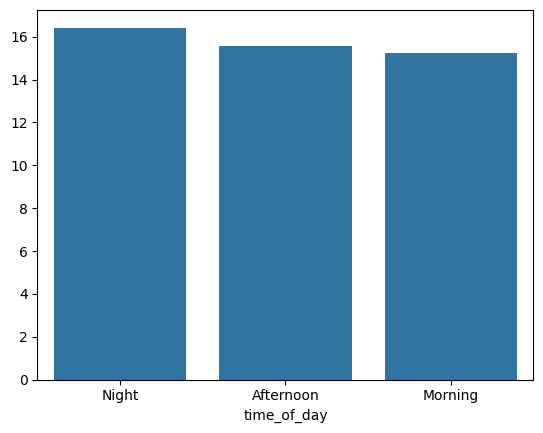

In [ ]:
# which time of day is most dangerous?
Time_analysis=df.groupby("time_of_day")["total"].mean().sort_values(ascending=False)
print(Time_analysis)
sns.barplot(x=Time_analysis.index,y=Time_analysis.values)

road_condition
Dry    17.161538
Wet    15.683333
Icy    14.700000
Name: total, dtype: float64


<Axes: xlabel='road_condition'>

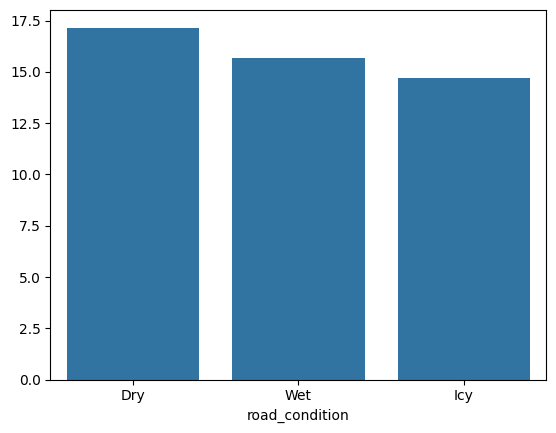

In [ ]:
# which road condition is worst?
Road_analysis=df.groupby("road_condition")["total"].mean().sort_values(ascending=False)
print(Road_analysis)
sns.barplot(x=Road_analysis.index,y=Road_analysis.values)

In [ ]:
df.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev', 'weather', 'road_condition',
       'time_of_day'],
      dtype='object')

<Axes: xlabel='total', ylabel='Count'>

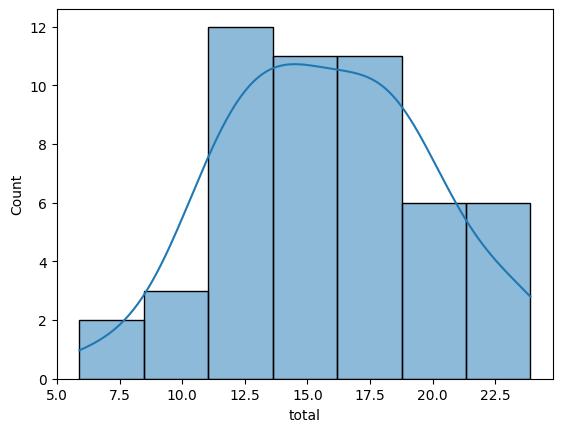

In [ ]:
sns.histplot(x=df['total'],kde=True)

<Axes: >

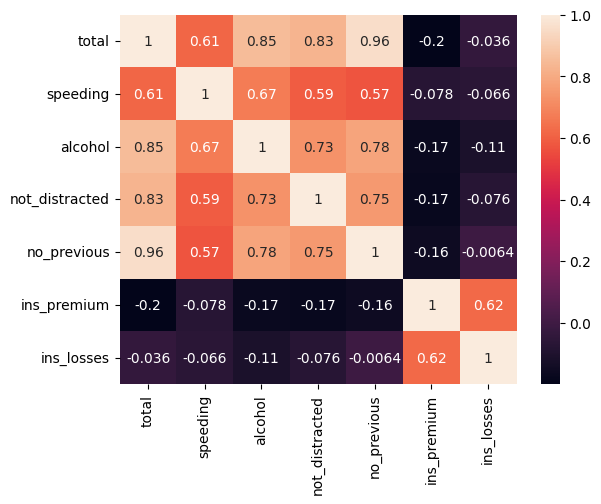

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

✅ High positive correlations (closer to 1):

total vs no_previous (0.96) → States with more accidents also have more drivers with no previous accidents.

total vs alcohol (0.85) → More accidents happen where alcohol-related crashes are high.

alcohol vs not_distracted (0.73) → Alcohol involvement relates to distraction levels.


✅ Moderate correlation:

total vs speeding (0.61) → Speeding also contributes, but less than alcohol.


✅ Low/negative correlations:

ins_premium & accidents (-0.2) → Higher insurance premium doesn’t strongly link to accident rates.

ins_losses & accidents (~0) → Insurance losses don’t correlate much with crashes.


👉 In simple words:

Alcohol and new drivers strongly increase accidents.

Speeding matters but less than alcohol.

Insurance cost is NOT directly linked to accident numbers.

time_of_day  Afternoon    Morning      Night
weather                                     
Clear           18.600  11.000000  14.800000
Foggy           15.125  15.683333  15.666667
Rainy           16.450  17.960000  18.000000
Snowy           14.000  14.312500  18.825000


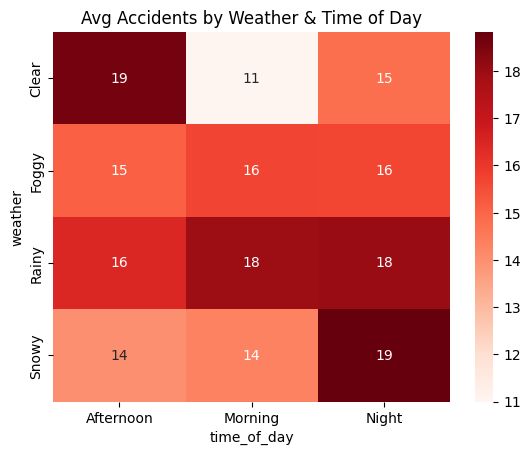

In [ ]:
# which time of day is most dangerous under different Weather condition?

import matplotlib.pyplot as plt
combo = df.groupby(['weather','time_of_day'])['total'].mean().unstack()
print(combo)
sns.heatmap(combo, annot=True, cmap="Reds")
plt.title("Avg Accidents by Weather & Time of Day")
plt.show()

1️⃣ Avg Accidents by Weather & Time of Day (Heatmap)

Rainy mornings & nights have the highest accidents (18).

Snowy nights are also very risky (19).

Clear mornings are safest (only 11).


👉 Meaning: Bad weather (Rainy/Snowy) + Night/Morning = more accidents.

   abbrev  total weather road_condition time_of_day
34     ND   23.9   Rainy            Dry     Morning
40     SC   23.9   Snowy            Wet       Night
48     WV   23.8   Rainy            Dry       Night
3      AR   22.4   Snowy            Dry     Morning
26     MT   21.4   Rainy            Dry     Morning


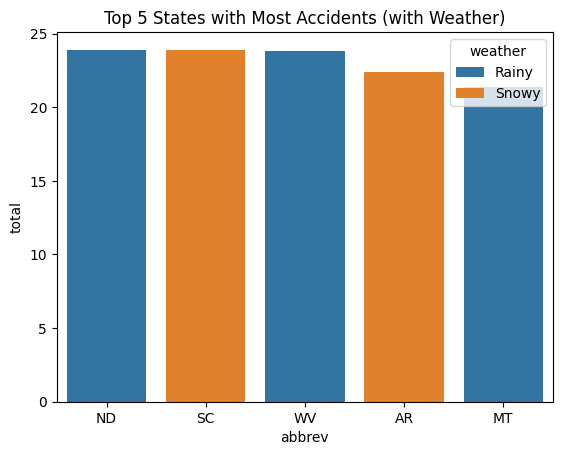

In [ ]:
# which states have the highest total accident?


top_states = df.sort_values('total', ascending=False).head(5)
print(top_states[['abbrev', 'total', 'weather', 'road_condition', 'time_of_day']])

sns.barplot(data=top_states, x='abbrev', y='total', hue='weather')
plt.title("Top 5 States with Most Accidents (with Weather)")
plt.show()

2️⃣ Top 5 States with Most Accidents (Bar Plot)

ND, SC, WV, AR, MT are the worst accident hotspots.

In these states, Rainy & Snowy weather are the main conditions during accidents.


👉 Meaning: These 5 states need better road safety during Rain & Snow.

Overall Summary:

Rainy and Snowy weather, especially at night, cause more accidents.

Speeding and alcohol-related crashes are major contributors.

Top accident hotspot states are ND, SC, WV, AR, and MT.

Insurance cost doesn’t strongly affect accident rates.


👉 Better road safety is needed in bad weather and high-risk states.